In [3]:
# Importing necessary libraries
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

In [6]:
# Load the data
file_path = 'so_tay_sinh_vien.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

In [25]:
# 1. Basic Information
# - Number of lines
num_lines = len(data)
print(f"Số lượng dòng: {num_lines}\n")

# - Length of each line
line_lengths = [len(line.strip()) for line in data]
print(f"Độ dài dòng trung bình: {sum(line_lengths) / num_lines:.2f} characters\n")

# - Summary statistics of line lengths
line_lengths_series = pd.Series(line_lengths)
print(line_lengths_series.describe())

Số lượng dòng: 2093

Độ dài dòng trung bình: 111.54 characters

count    2093.000000
mean      111.543239
std       121.945693
min         0.000000
25%        36.000000
50%        77.000000
75%       151.000000
max      1807.000000
dtype: float64


In [26]:
# Summary of paragraph lengths
paragraph_lengths = [len(paragraph) for paragraph in paragraphs]
print(f"Số lượng đoạn văn (paragraphs): {len(paragraphs)}\n")
print(pd.Series(paragraph_lengths).describe())

# Optional: Save processed data to a CSV for further analysis
output_df = pd.DataFrame({
    'line': data,
    'line_length': line_lengths
})
output_df.to_csv('processed_data.csv', index=False, encoding='utf-8')

Số lượng đoạn văn (paragraphs): 132

count      132.000000
mean      1782.484848
std       1719.746810
min          3.000000
25%        724.000000
50%       1311.500000
75%       2177.000000
max      10377.000000
dtype: float64


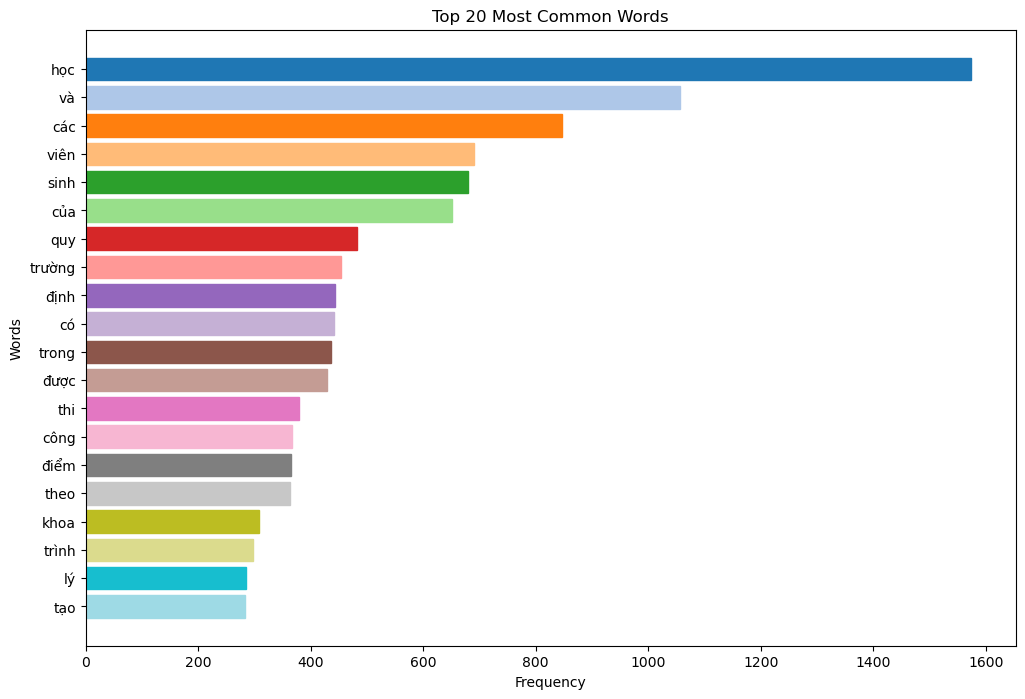

In [16]:
# Tokenizing words (splitting and cleaning)
words = [word for line in data for word in re.findall(r'\b\w+\b', line.lower())]
common_words = Counter(words).most_common(20)

# Creating DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Visualizing the most common words
plt.figure(figsize=(12, 8))
bars = plt.barh(common_words_df['word'], common_words_df['count'], color=plt.cm.tab20.colors)

# Adding color variation to each bar
for i, bar in enumerate(bars):
    bar.set_color(plt.cm.tab20.colors[i % len(plt.cm.tab20.colors)])

# Adding labels and title
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.gca().invert_yaxis()  # To have the highest count on top
plt.show()

In [17]:
# Generate bigrams (cặp từ) and trigrams (bộ ba từ)
bigrams = [(words[i], words[i + 1]) for i in range(len(words) - 1)]
trigrams = [(words[i], words[i + 1], words[i + 2]) for i in range(len(words) - 2)]

# Find the 20 most common bigrams and trigrams
common_bigrams = Counter(bigrams).most_common(20)
common_trigrams = Counter(trigrams).most_common(20)

# Convert to DataFrame for easier visualization
bigrams_df = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])
trigrams_df = pd.DataFrame(common_trigrams, columns=['trigram', 'count'])

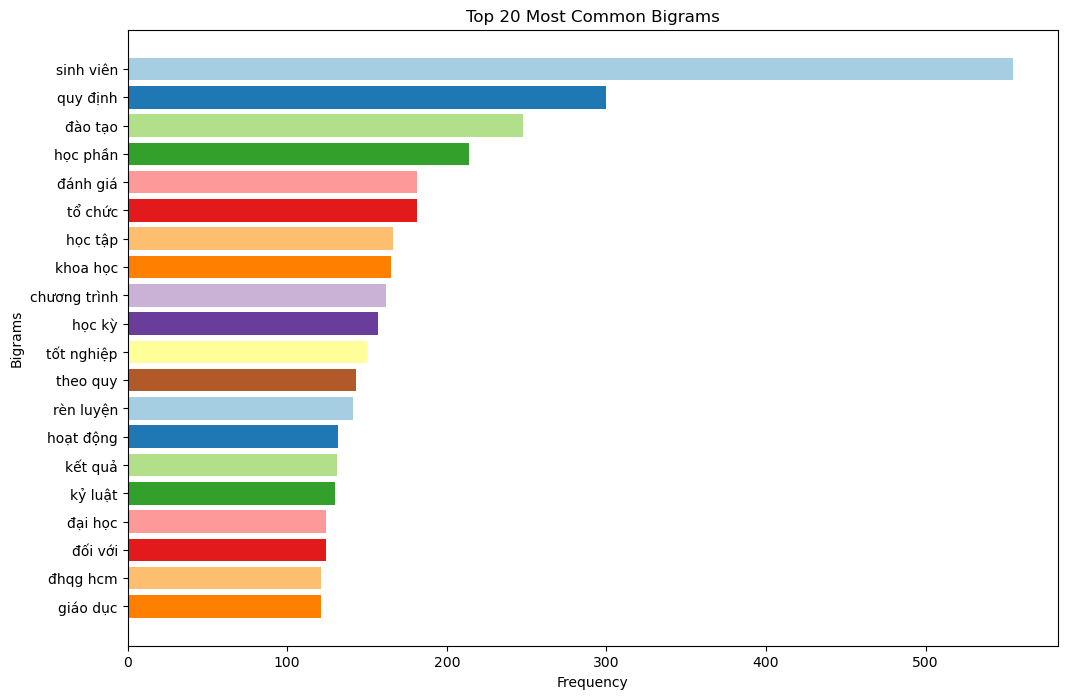

In [18]:
# Visualizing the most common bigrams
plt.figure(figsize=(12, 8))
bars = plt.barh([' '.join(bigram) for bigram in bigrams_df['bigram']], bigrams_df['count'], color=plt.cm.Paired.colors)
plt.title("Top 20 Most Common Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.gca().invert_yaxis()  # Invert Y axis for descending order
plt.show()

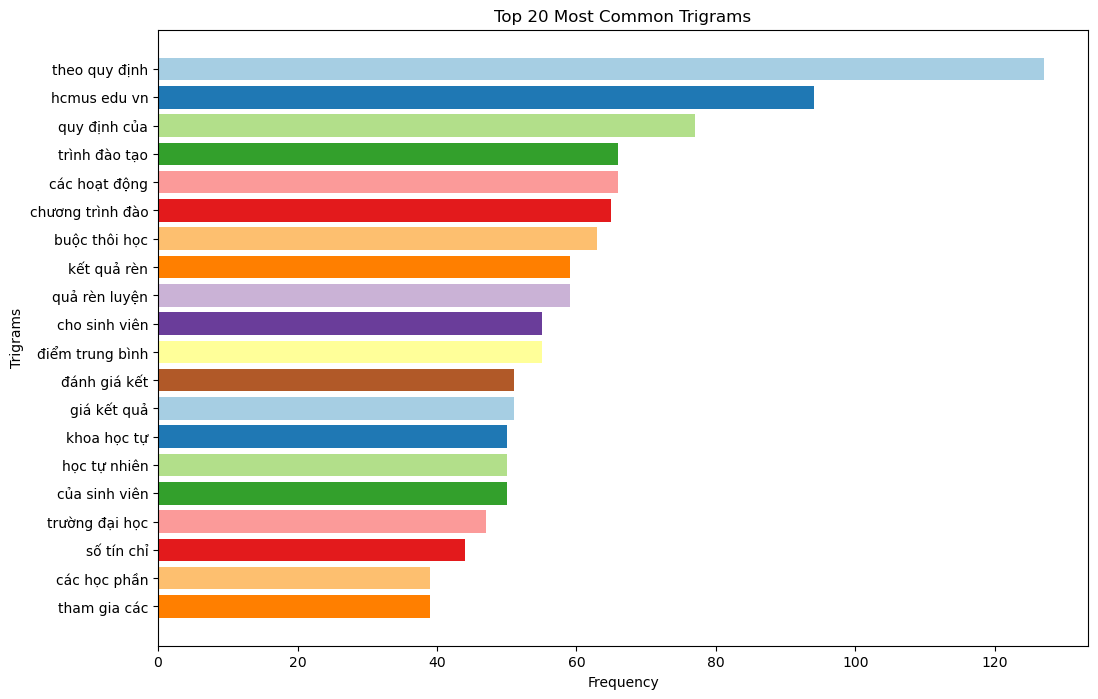

In [19]:
# Visualizing the most common trigrams
plt.figure(figsize=(12, 8))
bars = plt.barh([' '.join(trigram) for trigram in trigrams_df['trigram']], trigrams_df['count'], color=plt.cm.Paired.colors)
plt.title("Top 20 Most Common Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.gca().invert_yaxis()  # Invert Y axis for descending order
plt.show()